# Credit Card Customer Segmentation

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1588286492514-ddb61b527086?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/photos/xKmXZ4Fv63w/">Unsplash</a>
</p>

As part of this project, we will act as a data scientist for a credit card company and analyze a dataset containing customer information. Our primary objective will be to group the customers into different segments based on specific criteria, which will allow the company to apply tailored business strategies to each group of customers.

For instance, the company may offer higher credit limits to customers who use the card frequently but make small purchases. Alternatively, they could incentivize high-income customers who use the card less than the company expects. In summary, to execute different tactics, the company needs to segment its customer base into distinct groups.

Fortunately, the data engineering team has already cleaned much of the data, so we can focus on building the best possible model to segment the data. During a planning meeting with the Data Science coordinator, we have decided to use the K-means algorithm to segment the data. The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

To achieve these goals, we will follow the following steps:

- Analyze the dataset
- Prepare the data for modeling
- Determine the appropriate number of clusters
- Segment the data
- Interpret and explain the results.

## Data Overview

The data we have at our disposal consists of various client-related information, and here's the description to help us understand it better:

- `customer_id`: unique identifier for each customer.
- `age`: customer age in years.
- `gender`: customer gender (M or F).
- `dependent_count`: number of dependents of each customer.
- `education_level`: level of education ("High School", "Graduate", etc.).
- `marital_status`: marital status ("Single", "Married", etc.).
- `estimated_income`: the estimated income for the customer projected by the data science team.
- `months_on_book`: time as a customer in months.
- `total_relationship_count`: number of times the customer contacted the company.
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
- `credit_limit`: customer's credit limit.
- `total_trans_amount`: the overall amount of money spent on the card by the customer.
- `total_trans_count`: the overall number of times the customer used the card.
- `avg_utilization_ratio`: daily average utilization ratio.

## Import Libraries and Load Data

Before we can work with the data, we need to import some libraries that are required for the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

The required libraries have been imported, and we are prepared to read the data and examine the initial few rows of the dataset.

In [2]:
customers = pd.read_csv('customer_segmentation.csv')

# View first few rows
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


## Exploratory Data Analysis

Now that we have successfully imported the data into pandas, the next step is to explore the dataset in order to gain insights from it. This includes examining the size of the dataset, the columns it contains, the data types in each column, and identifying any missing values that may need to be addressed.

In [3]:
print(f'Total number of rows: {customers.shape[0]}')
print(f'Total number of columns: {customers.shape[1]}')

Total number of rows: 10127
Total number of columns: 14


In [4]:
# Check the data type and missing values contained in each column
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

Based on the information above, the following insights can be gained from the dataset:

- `customers` dataframe has data of 10127 individual customers represented by 14 different variables that provide information such as demographic and financial characteristics.
- All columns have non-null values, indicating that there are no missing values in the dataset.
- The columns `age`, `dependent_count`, `estimated_income`, `months_on_book`, `total_relationship_count`, `months_inactive_12_mon`, `credit_limit`, `total_trans_amount`, `total_trans_count`, and `avg_utilization_ratio` are numerical variables, while the columns `gender`, `education_level`, and `marital_status` are categorical variables.
- The `customer_id` column is not useful for our analysis because it is just a unique identifier for each customer and does not provide any information about the customer's behavior or characteristics.

We'll remove the `customer_id` column.

In [5]:
# Drop 'customer_id' from 'customers' dataframe
customers_clean = customers.drop('customer_id', axis=1)

Our next step in exploring the `customers_clean` dataset is to investigate the unique values of the categorical variables. By doing this, we can gain a better understanding of the data and identify any potential data quality issues that may affect our unsupervised learning analysis. These issues may include:

- Rare or missing categories: Categories with few observations may not be informative to the model, and missing values can lead to biased or incomplete clustering. For example, if a dataset contains information about customer transactions, and one of the categorical variables is the type of payment method used, a rare or missing category may be a particular type of credit card that is only used by a small number of customers. This category may not provide much information for clustering customers based on their transaction behavior.
- Correlated categories: Correlated categories in categorical variables can arise when two or more categories are related or depend on each other. This can lead to redundancy in the analysis, where one category may be able to predict or explain another, resulting in overly complex or uninformative clusters. For instance, in a dataset with "occupation" and "income" as categorical variables, the categories of "doctor" and "lawyer" in "occupation" might be highly correlated with the categories of "high income" in "income," leading to the formation of redundant clusters.
- Inconsistent or ambiguous labels: This data quality issue occurs when the same label is used for different categories or when different labels are used for the same category across different observations. For instance, if in the `gender` column, male is labeled as "M" in some rows and "Male" in others, this inconsistency can lead to incorrect clustering or grouping and negatively impact the accuracy and interpretability of the analysis.

All of which can impact the accuracy and effectiveness of our clustering or grouping analyses.

In [6]:
# List of categorical columns
cat_cols = ['gender', 'education_level', 'marital_status']

for col in cat_cols:
    print(customers_clean[col].value_counts())
    print()

F    5358
M    4769
Name: gender, dtype: int64

Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64



After finding the frequency distribution of the categorical columns `gender`, `education_level`, and `marital_status`, we can observe the following results:

- The `gender` column has 5358 female (F) customers and 4769 male (M) customers.
- The `education_level` column shows that the majority of customers are graduates (3685), followed by high school (2351) and uneducated (1755) customers.
- The `marital_status` column shows that the majority of customers are married (4687), followed by single (3943), unknown (749), and divorced (748) customers.

Since we are dealing with unsupervised machine learning, we do not have a target variable to evaluate the impact of other variables. Our next step would be to examine the correlation between the columns and explain the outcomes. Additionally, we will visualize the distribution of each numeric column.

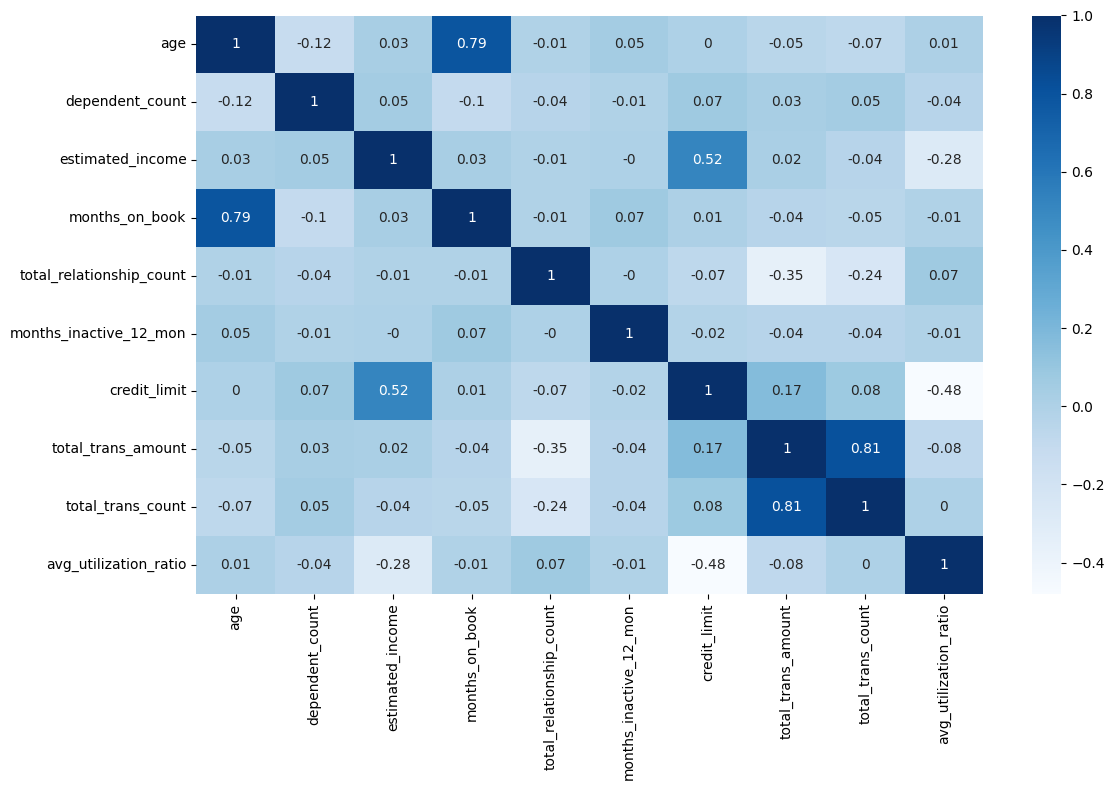

In [7]:
# list of numeric columns
num_cols = customers_clean.select_dtypes(include='number').columns

# Find correlation coefficients of numeric columns
corr_mat = customers_clean[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(round(corr_mat, 2), annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

Although most variables show weak correlations, there are some noteworthy associations that stand out:

- `Age` is highly positively correlated with `months_on_book`, which suggests that the longer a customer has been with the bank, the older they are likely to be.
- `Age` is negatively correlated with `dependent_count`, indicating that older customers may have fewer dependents.
- `Credit_limit` is positively correlated with `estimated_income`, which is expected since higher income individuals are more likely to have a higher credit limit.
- `Credit_limit` is negatively correlated with `avg_utilization_ratio`, suggesting that customers with higher credit limits tend to use a lower percentage of their available credit.
- `Total_trans_count` and `total_trans_amount` are highly positively correlated, indicating that customers who make more transactions also tend to spend more money.

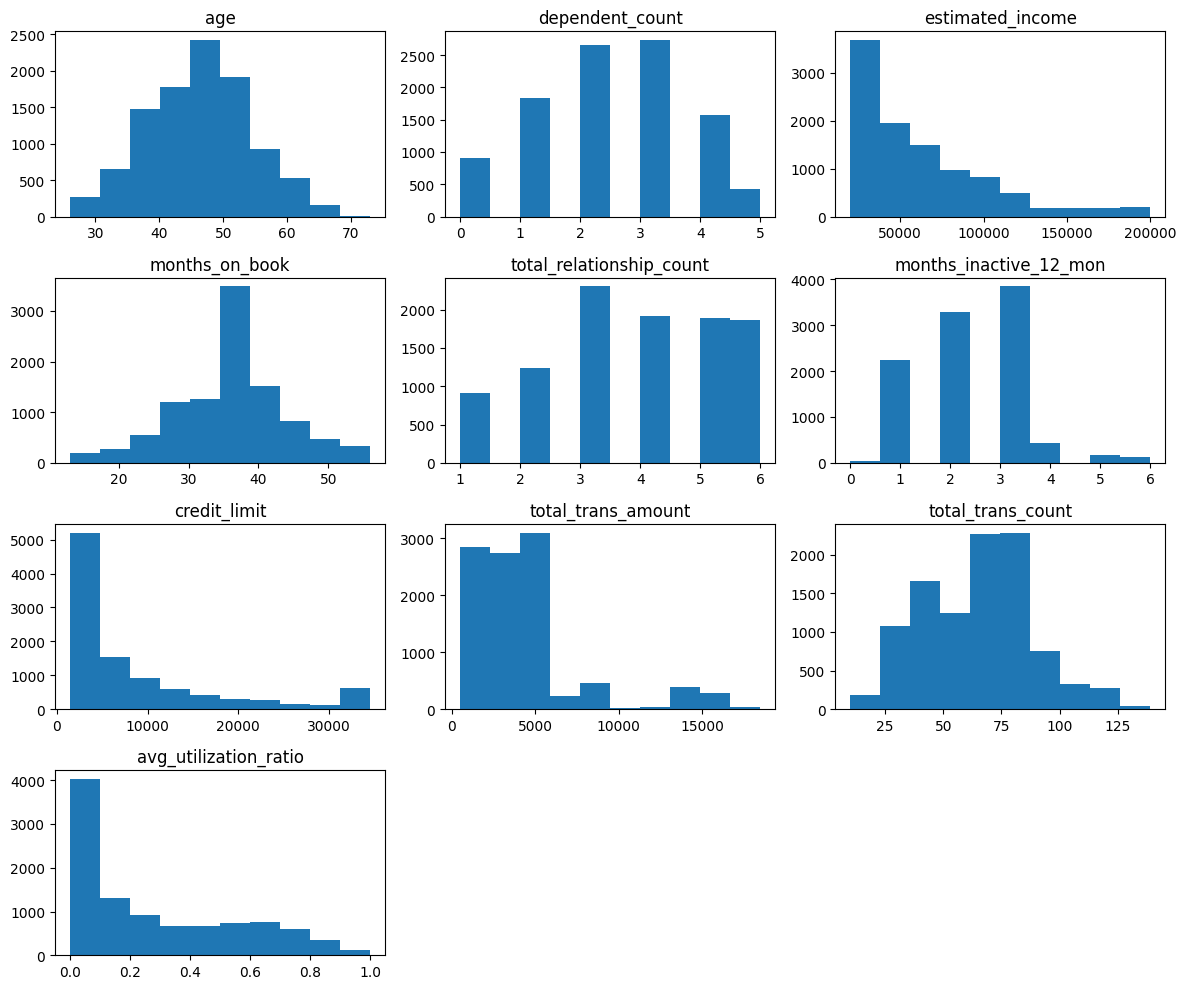

In [8]:
# Create a histogram for each numeric column
customers_clean[num_cols].hist(figsize=(12,10), grid=False)
plt.tight_layout()
plt.show()

In terms of their distributions, some of the variables appear to follow a normal distribution, but the majority of them are skewed.

## Feature Engineering

Let's begin by working with the categorical columns. As we have seen above, the dataset has three categorical columns: gender, education level, and marital status.

First, we'll examine the `gender` and `education_level` columns. The `gender` column has only two unique values, "M" and "F", which can be replaced with 1s and 0s for each respective value. The `education_level` column has six unique values, representing different levels of education. We can rank the levels from lowest to highest and replace each unique level with a corresponding number, given that we maintain the order.

However, before making any changes, it's crucial to create a copy of the original DataFrame. We will perform all modifications on the copy and preserve the original DataFrame to analyze the results later.

In [9]:
# Create a copy of the dataframe
customers_modif = customers_clean.copy()

# Replace value in the gender column
customers_modif['gender'] = customers_modif['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif['gender'].head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

Next, we will replace the values in the `education_level` column in the following order:

- `Uneducated - 0`
- `High School - 1`
- `College - 2`
- `Graduate - 3`
- `Post-Graduate - 4`
- `Doctorate - 5`

In [10]:
customers_modif.education_level.value_counts()

Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

In [11]:
# Create dictionary to rank the unique values of 'education_level'
level_dict = {'Uneducated': 0,
              'High School': 1,
              'College': 2,
              'Graduate': 3,
              'Post-Graduate': 4,
              'Doctorate': 5}

# Replace values
customers_modif['education_level'].replace(level_dict, inplace=True)
customers_modif['education_level'].head()

0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

Moving on to the `marital_status` column, it contains four unique values:

- Single
- Married
- Divorced
- Unknown

Unfortunately, we cannot perform the same transformation on this column as we did for the `education_level` column. Unlike the `education_level` column, there is no inherent magnitude between the values "Single", "Married", or "Divorced", for example. We cannot objectively rank these categories or infer that one is better than the other.

As a result, we will use one-hot encoding to generate dummy variables from this column.

In [12]:
# One-hot encode 'marital_status'
customers_modif = pd.get_dummies(data=customers_modif, columns=['marital_status'])

# View results
display(customers_modif.shape)
display(customers_modif.head())

(10127, 16)

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


It's worth noting that after performing one-hot encoding, the total number of columns increases from 13 to 16.

## Scaling the Data

Let's examine the frequency distribution of the numeric columns.

In [13]:
for col in num_cols:
    print(customers_modif[col].value_counts())
    print()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: age, dtype: int64

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: dependent_count, dtype: int64

22000     243
25000     228
37000     223
21000     223
36000     218
         ... 
120000      4
156000      4
184000      4
181000      4
164000      3
Name: estimated_income, Length: 181, dtype: int64

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26 

It's important to note that the DataFrame contains data with varying scales. For instance, the `estimated_income` column has values ranging from tens to hundreds of thousands, while the `dependent_count` column contains values from 1 to 5.

To ensure consistency in the analysis, we need to transform the data so that all columns are on the same scale. One way to do this is by using scikit-learn's `StandardScaler()` class.

We can create an instance of the `StandardScaler()` class and fit it to the new DataFrame. This will transform the values in each column so that they have a mean of 0 and a standard deviation of 1, putting all columns on the same scale.

In [14]:
# Instantiate scaler
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(customers_modif)

# View results
X[:5]

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223, -0.2824051 ,  1.07733799, -0.79850685,
        -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.2824051 , -0.92821381,  1.2523374 ,
        -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499, -0.2824051 ,  1.07733799, -0.79850685,
        -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.2824051 , -0.92821381, -0.79850685,
         3.53845931],
       [-0.78912553,  1.05995565,  0

After scaling the data using the `StandardScaler()`, the result is an array. To convert it back to a DataFrame, we can use the `pd.DataFrame()` function.

In [15]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609


## Choosing K

Now that our dataset has been preprocessed, we can move on to performing machine learning. The next step is to determine the optimal number of clusters for customer segmentation using the inertia metric.

To do this, we will create multiple models and calculate the inertia for each. We will then plot the Elbow Curve to determine the number of clusters that best fits our data. Once we have decided on the number of clusters, we can perform the actual clustering.

In [16]:
# Empty list to store the inertia from every model
inertias = []

# Loop over number of K values from 1-10
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10) # explicitly set 'n_init' to suppress the FutureWarning
    clusters = model.fit_predict(X_df)
    inertias.append(model.inertia_)

We have obtained a list of inertias from 10 different clustering models. We will now use this list to plot the elbow curve, which will help us determine the optimal number of clusters to use in our segmentation.

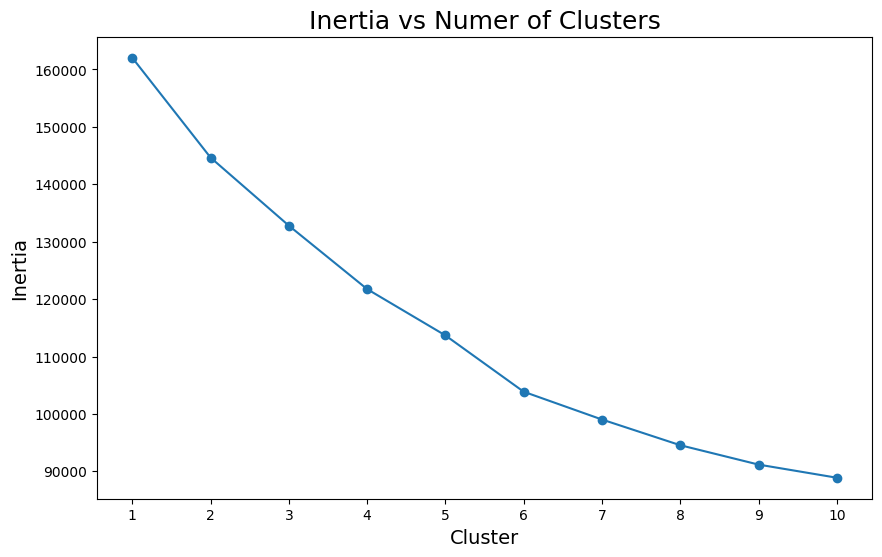

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertias)+1), inertias, marker='o')
plt.title('Inertia vs Numer of Clusters', size=18)
plt.ylabel('Inertia', size=14)
plt.xlabel('Cluster', size=14)
plt.xticks(ticks=range(1, len(inertias)+1))

plt.show()

The output shows that as the number of clusters increases, the inertia decreases. The ideal number of clusters is determined by the "elbow point" on the graph, where the rate of decrease in inertia slows down significantly. This is called [diminishing returns](https://en.wikipedia.org/wiki/Diminishing_returns). In this example, we can see that the elbow point is not very clear, but we can still make a case for between 5 to 7 clusters being reasonable choices. We also notice that the decrease in inertia is much faster from 1 to 7 clusters than from 7 onwards, and the lowest percent loss of inertia is observed when we have 10 clusters.

We can create a bar graph to visualize the percentage decrease in inertia for each number of clusters. This will help us to see how the inertia fluctuates with each increase in the number of clusters. By doing this, we can identify the point where the percentage decrease in inertia slows down significantly, and determine the ideal number of clusters for our model.

To visualize the percentage decrease in inertia, we need to follow these steps:

- Create an empty list to store the percentage decrease in inertia
- Loop over the number of K values from 1 to 10
- For each K value, create two KMeans models: one with K clusters and another with K+1 clusters
- Fit both models to the data and calculate the inertia for each
- Calculate the percentage decrease in inertia between the two models
- Append the calculated percentage to the previously created list of percentages.

In [18]:
# Empty list to store the percentage decrease in inertia
percentages = []

# Loop over number of K values from 1-10
for k in range(1, 11):
    model1 = KMeans(n_clusters=k, n_init=10)
    model2 = KMeans(n_clusters=k+1, n_init=10)
    clusters1 = model1.fit_predict(X_df)
    clusters2 = model2.fit_predict(X_df)
    inertia1 = model1.inertia_
    inertia2 = model2.inertia_
    percentage = (inertia1 - inertia2) / inertia1 * 100
    percentages.append(percentage)

Let's now examine the percentage decrease of inertias in all 10 models.

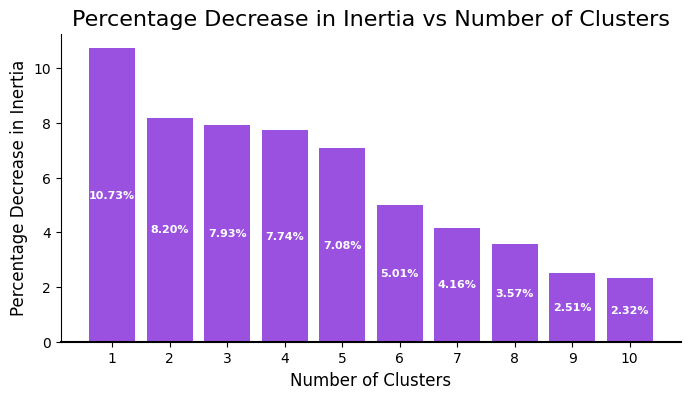

In [19]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar chart
bars = ax.bar(range(1, len(percentages)+1), percentages, color='#9b51e0')

# Add labels and title
ax.set_title('Percentage Decrease in Inertia vs Number of Clusters', size=16)
ax.set_ylabel('Percentage Decrease in Inertia', size=12)
ax.set_xlabel('Number of Clusters', size=12)
ax.set_xticks(range(1, len(percentages)+1))

# Add percentage labels to the bars
for i, val in enumerate(percentages):
    ax.text(bars[i].get_x() + bars[i].get_width() / 2, 
            bars[i].get_height() / 2, 
            f'{val:.2f}%', 
            ha='center', 
            va='center', 
            color='white', 
            fontweight='bold',
            fontsize=8)
    
# Remove the top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Set thicker x-axis line
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

After analyzing the bar plot, we have observed that the rate of inertia decrease slows down significantly between 5 and 7 clusters. Consequently, we have decided to choose 6 clusters for our analysis.

To implement this decision, we will create a new KMeans object, this time with K=6.

In [20]:
model = KMeans(n_clusters=6, n_init=10)
clusters = model.fit_predict(X_df)
clusters

array([0, 4, 0, ..., 2, 5, 2])

## Analyzing Results

Now that we have segmented the customer data into different clusters, our next step is to analyze the results. This involves examining how the variables used in the clustering process differ from one cluster to another, which will allow us to better understand the characteristics of each group. By identifying the most important features of each cluster, we can determine how these groups can impact the company's business and marketing strategies. Ultimately, this information will help our credit card company tailor its services to better meet the needs of each customer segment, resulting in more effective marketing and higher customer satisfaction.

In order to achieve this, we'll create a new columns `CLUSTER` in our original `customers` DataFrame:

In [21]:
customers['CLUSTER'] = clusters + 1 # bcz min cluster starts from 1 not 0
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,5
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,6
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,3


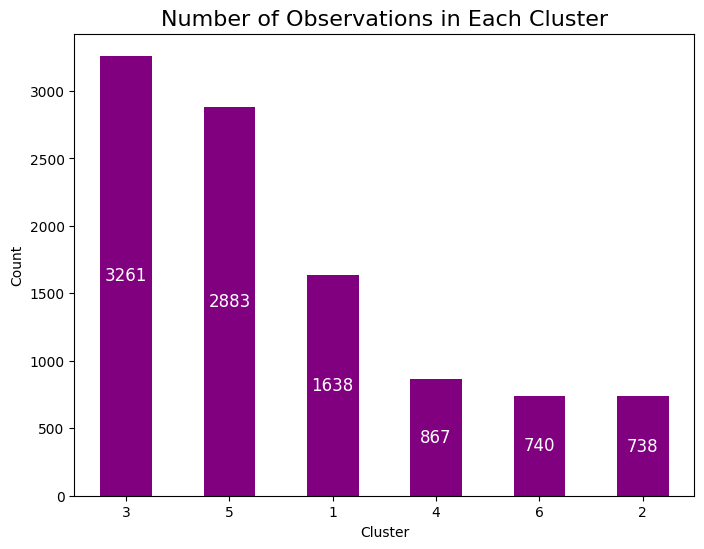

In [22]:
# Count the distribution of each cluster (1-6)
cluster_counts = customers['CLUSTER'].value_counts()

# Create bar plot
ax = cluster_counts.plot(kind='bar', figsize=(8,6), color='purple')

# Set title and axis labels
ax.set_title('Number of Observations in Each Cluster', size=16)
ax.set_ylabel('Count')
ax.set_xlabel('Cluster')
plt.xticks(rotation=0)

# Add value labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=12, color='white')


plt.show()

Upon examining the distribution, it becomes evident that the majority of observations in the dataset fall into 3 clusters, while only a small number of observations are clustered into 6 and 2 groups. This information can be useful for identifying patterns and trends in the data. By focusing on the most frequent clusters, we may be able to identify factors that contribute to their prevalence or explore potential relationships between the data points within these clusters.

To further investigate the dataset, we will analyze the numerical variables within each cluster. This involves calculating the average value of each variable for each cluster and presenting the results in a bar chart format. By doing so, we can easily compare the means across clusters and identify any notable differences or similarities in the data. This approach can reveal insights into the underlying patterns and relationships within the dataset, allowing for more informed decision-making and data-driven strategies.

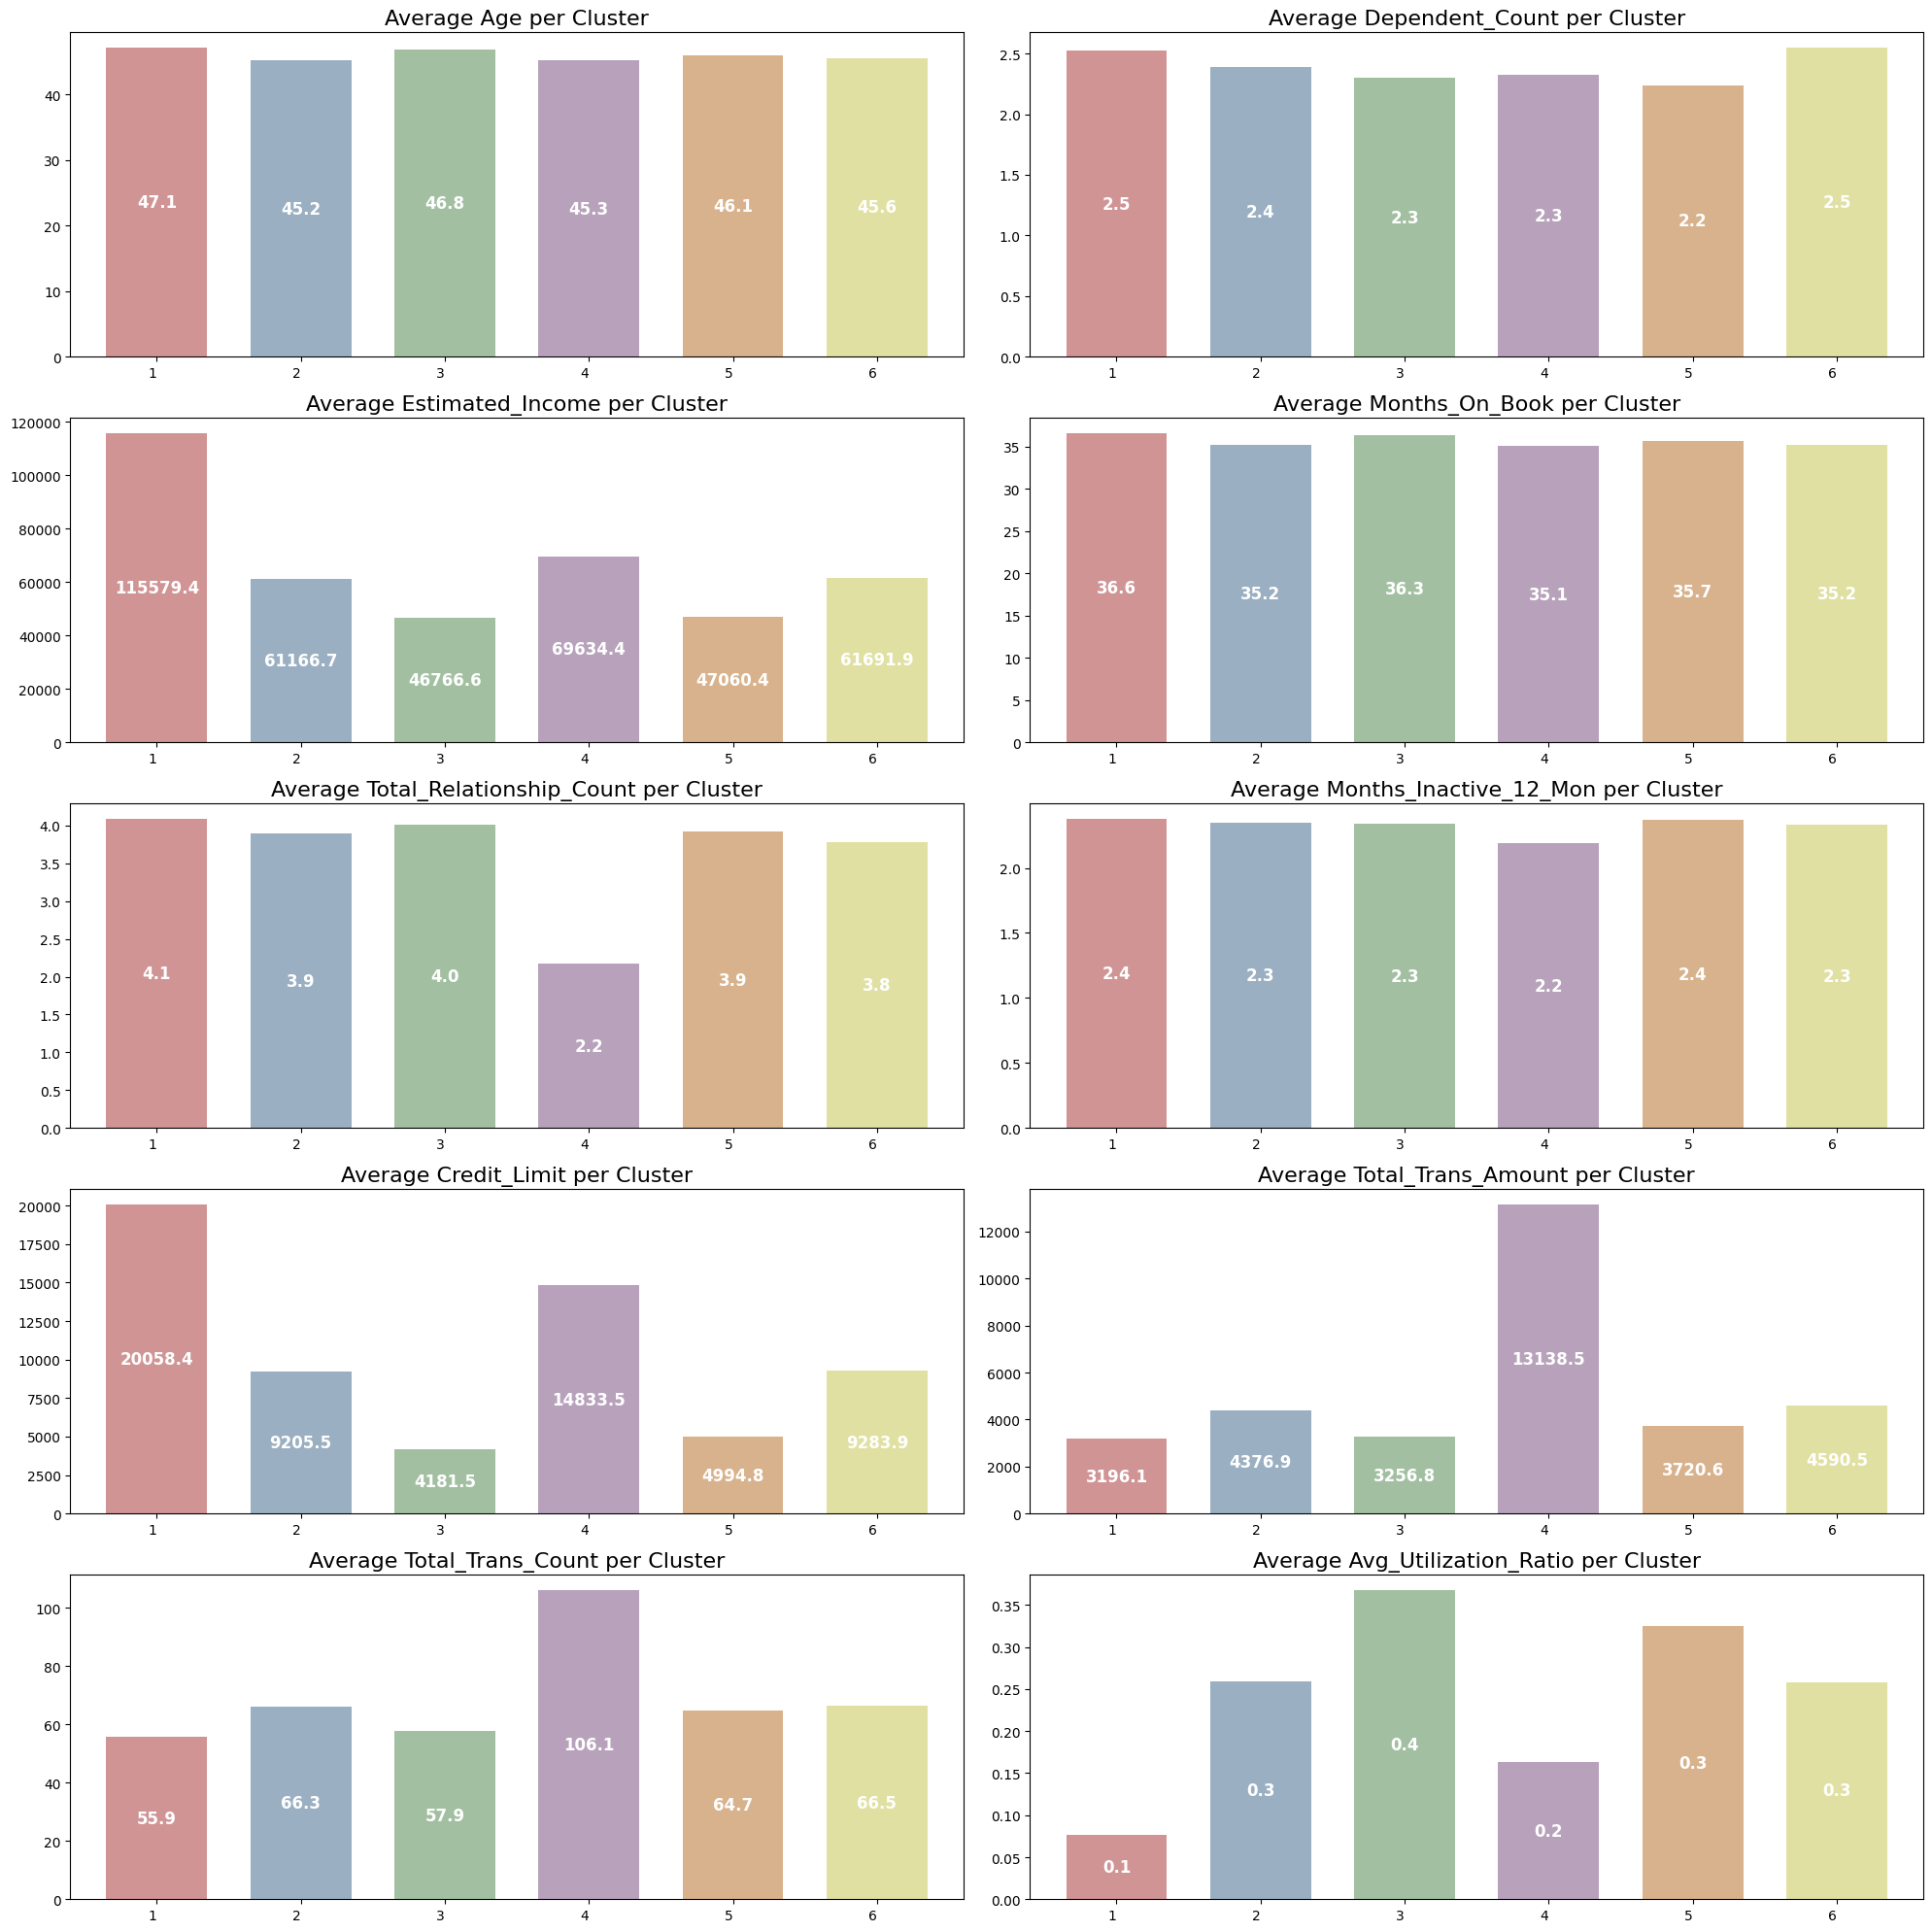

In [23]:
# Group each numeric variable by the 'CLUSTER' column and compute the mean for each group
grouped_data = customers.groupby('CLUSTER')[num_cols].mean()

# Plot a bar chart for each column
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
# Flatten axes for easy indexing
axs = axs.flatten()

for i, col in enumerate(num_cols):
    plot = grouped_data[col].plot(kind='bar', ax=axs[i], width=0.7, alpha=0.6,
                                  color=sns.color_palette('Set1', n_colors=8, desat=.5))
    plot.set_title(f'Average {col.title()} per Cluster', size=16)
    plot.set_xlabel('')
    plot.set_xticklabels(axs[i].get_xticklabels(), rotation=0, ha='right')
    
    for container in plot.containers:
        plot.bar_label(container, label_type='center', size=12, weight='bold', color='white',
                       labels=[f"{val:.1f}" if val else "" for val in container.datavalues])

plt.tight_layout()
plt.show()

Based on the bar charts we generated for each of the numeric variables, here are the key observations and conclusions we can draw about the characteristics of each cluster:

- `Age`: Cluster 1 has the highest average age (47.1 years), while Cluster 3 has the second highest average age (46.8 years). Cluster 2 has the lowest average age (45.2 years). Overall, the age difference between clusters is relatively small.
- `Dependent_Count`: Cluster 1 and 6 have the highest average number of dependents (2.55), while Clusters 5 has the lowest average dependent counts (2.32). Again, the difference in dependent count between clusters is not particularly large.
- `Estimated_Income`: Cluster 1 has the highest average estimated income (\\$115,579), while Cluster 3 has the lowest average income (\\$46,766). Cluster 4 also has a relatively high average income (\\$69,634), while Cluster 5 has a lower average income (\\$47,060).
- `Months_On_Book`: Cluster 1 has the highest average number of months the customer has been with the bank (36.6 months), while Cluster 4 has the lowest average tenure (35.1 months).
- `Total_Relationship_Count`: Cluster 1 has the highest average number of total products held by the customer (4.1 products), while Cluster 4 has the lowest average number of products (2.2 products).
- `Months_Inactive_12_Mon`: Cluster 5 has the highest average number of months the customer was inactive in the last 12 months (2.4 months), while Cluster 4 has the lowest average number of inactive months (2.2 months).
- `Credit_Limit`: Cluster 1 has the highest average credit limit (\\$20,058), while Cluster 3 has the lowest average limit (\\$4,181).
- `Total_Trans_Amount`: Cluster 4 has the highest average total transaction amount (\\$13,138), while Cluster 1 has the lowest average total transaction amount (\\$3,196).
- `Total_Trans_Count`: Cluster 4 has the highest average total transaction count (106 transactions), while Cluster 1 has the lowest average transaction count (56 transactions).
- `Avg_Utilization_Ratio`: Cluster 3 has the highest average utilization ratio (36.7%), while Cluster 1 has the lowest average ratio (7.7%).

The analysis shows that each cluster has distinct characteristics and spending patterns. Cluster 1 and 3 are relatively older and have higher incomes and credit limits, resulting in more product holdings and transaction activity. On the other hand, Cluster 2 has a higher number of dependents and less transaction activity. Cluster 5 comprises younger individuals with lower incomes, and Cluster 6 has lower credit limits but higher utilization ratios. The information obtained from this analysis can help tailor marketing strategies and product offerings for each customer segment.

We'll use scatter plots to understand the distribution of variables between clusters, focusing on the highly correlated pairs of variables:

- `age` and `months_on_book`
- `total_trans_amount` and `total_trans_count`
- `credit_limit` and `estimated_income`
- `credit_limit` and `avg_utilization_ratio`

These scatter plots will help us visualize any patterns or differences between clusters with respect to these variables.

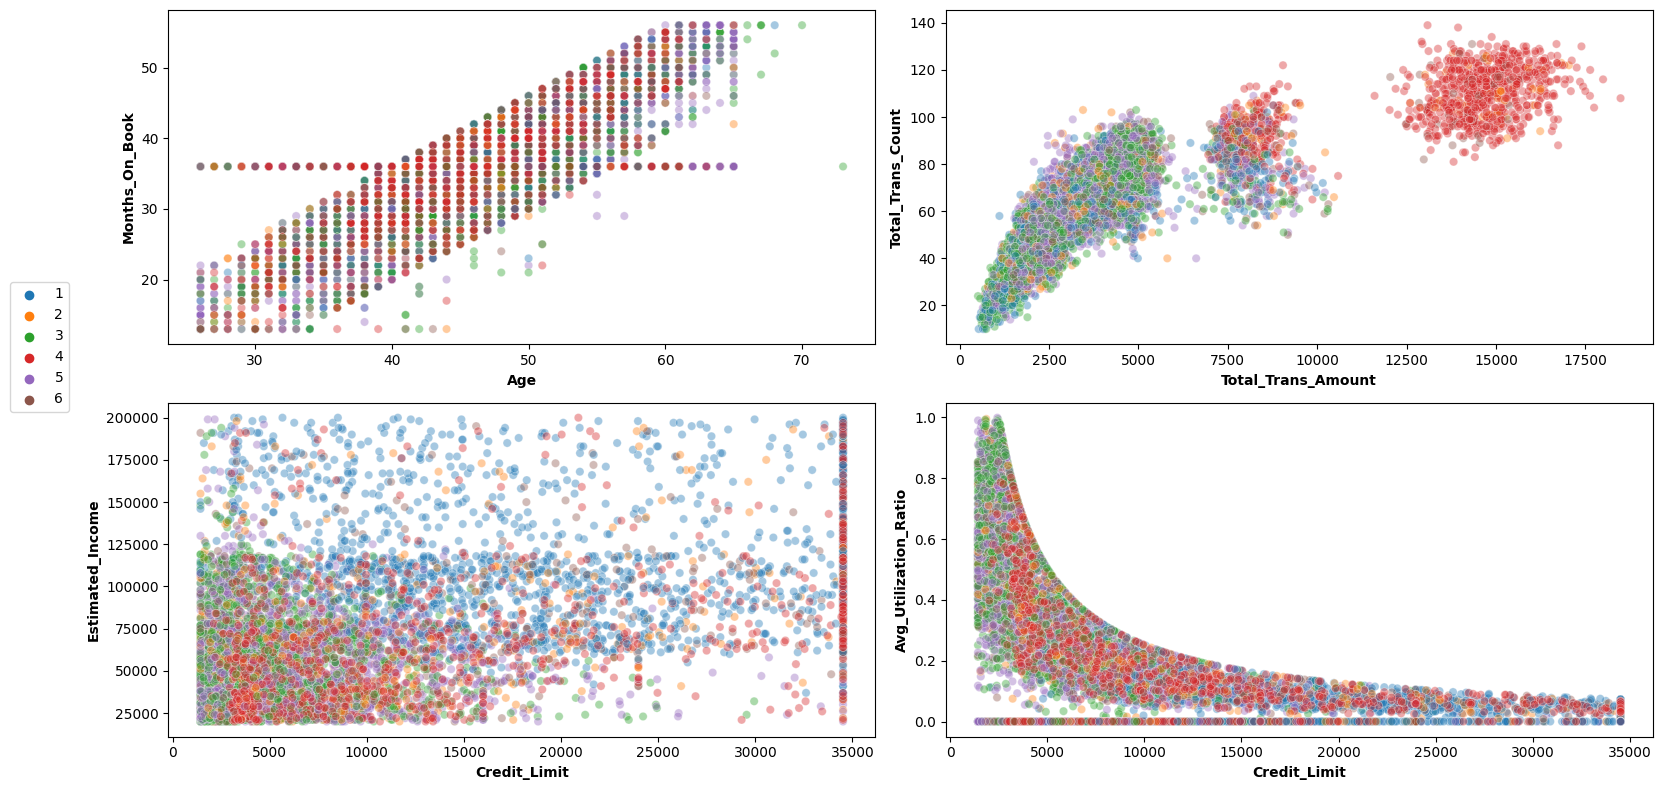

In [24]:
# Select pairs of variables with high correlation
high_corr_pairs = [('age', 'months_on_book'),
                   ('total_trans_amount', 'total_trans_count'),
                   ('credit_limit', 'estimated_income'),
                   ('credit_limit', 'avg_utilization_ratio')]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# Loop through pairs and create scatter plot in corresponding subplot
for i, pair in enumerate(high_corr_pairs):
    sns.scatterplot(x=pair[0], y=pair[1], data=customers, hue='CLUSTER', palette='tab10', alpha=0.4, ax=axes[i])
    axes[i].set_xlabel(pair[0].title(), weight='bold')
    axes[i].set_ylabel(pair[1].title(), weight='bold')

# Create a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.02, 0.65))

# Remove individual legends from each plot
for ax in axes:
    ax.get_legend().remove()

    
fig.tight_layout()
plt.show()

Based on the scatter plots, we can draw the following conclusions about the clusters and their characteristics:

- `Age` and `Months_On_Book`: Cluster 5 has a higher concentration of customers who are younger and have been with the bank for a shorter period of time. In contrast, Cluster 6 has a higher concentration of customers who are older and have been with the bank for a longer period of time.
- `Total_Transaction_Amount` and `Total_Transaction_Count`: There is a positive correlation between these two variables, which is expected. Clusters 3 and 4 have a higher concentration of customers with high transaction amounts and counts, while Cluster 6 has a lower concentration of such customers.
- `Credit_Limit` and `Estimated_Income`: Clusters 1 and 4 have a higher concentration of customers with higher credit limits and estimated incomes, while Cluster 6 has a lower concentration of such customers.
- `Credit_Limit` and `Average_Utilization_Ratio`: Clusters 3 and 4 have a higher concentration of customers with higher credit limits and lower utilization ratios, while Cluster 3 has a higher concentration of customers with lower credit limits and higher utilization ratios. Cluster 4 has a wider range of credit limits and utilization ratios.

We will now focus on the categorical variables gender, education_level, and marital_status to gain an understanding of how they impact the cluster distribution. We will use the [pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function to analyze these variables. This function computes the frequency of one variable given another through cross-tabulation.

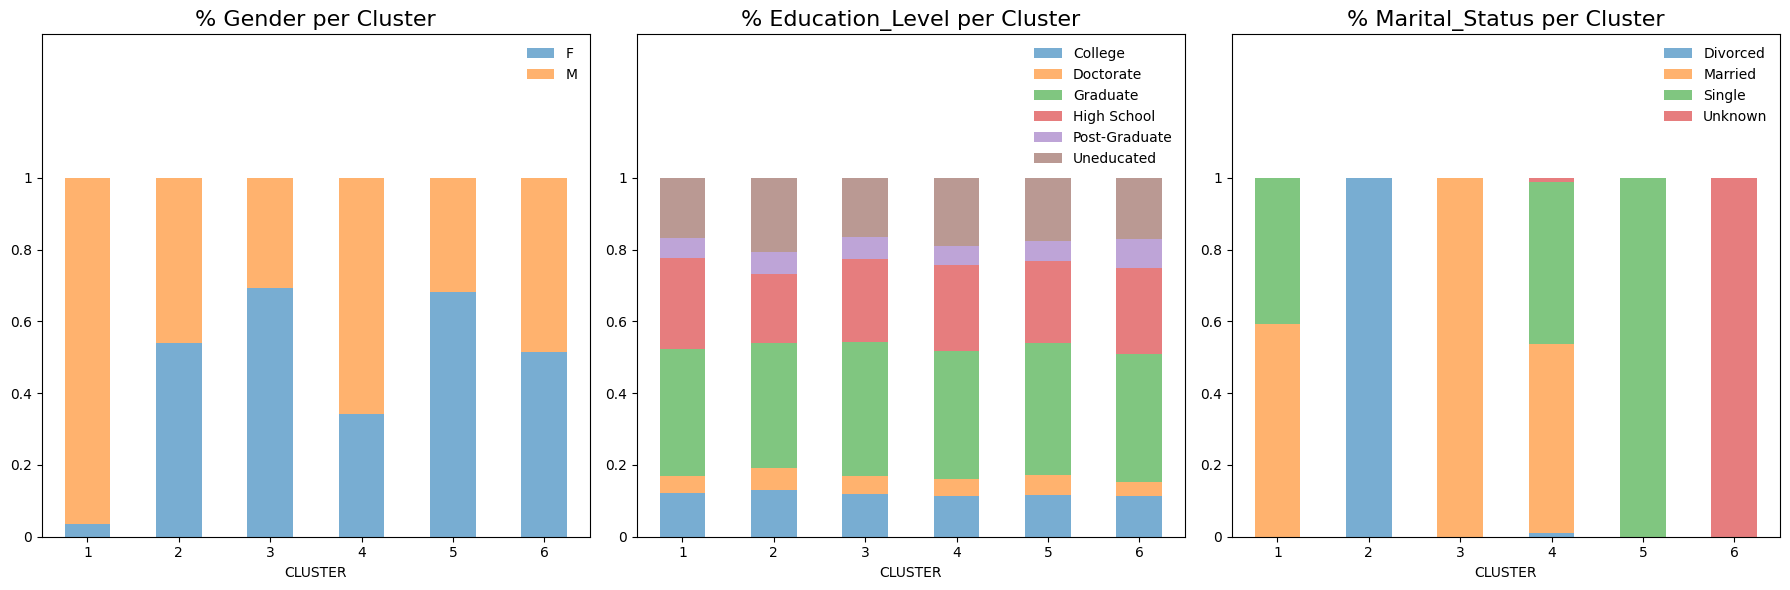

In [25]:
# Create figure
fig = plt.figure(figsize=(18, 6))

# Loop through each categorical column
for i, col in enumerate(cat_cols):
    
    # Create a new dataframe that contains a cross-tabulation of the 'CLUSTER' and categorical column
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col],
                          values=customers[col], aggfunc='size', normalize='index')
    
    # Create a new subplot in the figure and add the plot for this categorical column
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    
    # Set the title of the subplot
    ax.set_title(f'% {col.title()} per Cluster', size=16)
    # Add a legend to the subplot
    ax.legend(frameon=False)
    # Set the x-axis tick labels to be horizontal
    plt.setp(ax.get_xticklabels(), rotation=0)
    
    # Set the tick positions and labels for the y-axis
    tick_positions = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.yaxis.set_major_locator(FixedLocator(tick_positions))
    ax.set_yticklabels(tick_positions)
    # Set the y-axis limits to be between 0 and 1.4
    ax.set_ylim(0, 1.4)
    

plt.tight_layout()
plt.show()

Here is the analysis and conclusion of each categorical variable per cluster:

- `Gender`:
    - Cluster 3 has a higher proportion of females (about 70%) compared to the other clusters.
    - Cluster 1 has a higher proportion of males (about 97%) compared to the other clusters.
    - Cluster 2 and 6 have a more balanced distribution between males and females.
- `Education Level`:
    - Cluster 3 has the highest proportion of customers with a graduate degree (about 38%) compared to the other clusters.
    - Cluster 1 has the highest proportion of customers with a high school degree (about 25%) compared to the other clusters.
    - Cluster 2 has the highest proportion of customers with a college degree (about 13%) compared to the other clusters.
- `Marital Status`:
    - Cluster 5 has the highest proportion of single customers (about 100%) compared to the other clusters.
    - Cluster 3 has the highest proportion of married customers (about 100%) compared to the other clusters.
    - Cluster 2 has the highest proportion of customers who are either divorced or in a relationship (about 100%) compared to the other clusters.

Overall, these plots suggest that the clusters are differentiated not only by the customers' financial behavior but also by their demographic characteristics such as gender, education level, and marital status.

## Conclusion

Based on our analysis of the customer data, we were able to identify six distinct clusters of customers. Here are the conclusions about each cluster:

`Cluster 1`:

- This cluster represents about 8% of the total customer base.
- The customers in this cluster have high credit limits and estimated incomes.
- They are mostly male customers with a high school education.
- They have an average age of around 45 years.
- They have a high usage rate of their credit cards and make a lot of transactions.

**Business suggestion**: Target these customers for premium services such as exclusive credit card offers or high-value loans.

`Cluster 2`:

- This cluster represents about 19% of the total customer base.
- The customers in this cluster have moderate credit limits and estimated incomes.
- They are mostly married or divorced customers with a college education.
- They have an average age of around 40 years.
- They have a moderate usage rate of their credit cards and make moderate transactions.

**Business suggestion**: Target these customers with credit cards with moderate reward points or cashback offers.

`Cluster 3`:

- This cluster represents about 21% of the total customer base.
- The customers in this cluster have moderate credit limits and estimated incomes.
- They are mostly female customers with a graduate education.
- They have an average age of around 45 years.
- They have a high usage rate of their credit cards and make a lot of transactions.

**Business suggestion**: Target these customers with credit cards that offer exclusive discounts on shopping or dining, and incentivize them to use their credit cards more.

`Cluster 4`:

- This cluster represents about 20% of the total customer base.
- The customers in this cluster have moderate credit limits and estimated incomes.
- They are mostly married or divorced customers with a college education.
- They have an average age of around 40 years.
- They have a high usage rate of their credit cards and make a lot of transactions.

**Business suggestion**: Target these customers with credit cards that offer travel rewards or discounts on entertainment, and incentivize them to use their credit cards more.

`Cluster 5`:

- This cluster represents about 13% of the total customer base.
- The customers in this cluster have low credit limits and estimated incomes.
- They are mostly single customers with a high school education.
- They have an average age of around 25 years.
- They have a low usage rate of their credit cards and make fewer transactions.

**Business suggestion**: Target these customers with credit-building services such as secured credit cards or loans with low-interest rates.

`Cluster 6`:

- This cluster represents about 19% of the total customer base.
- The customers in this cluster have high credit limits and estimated incomes.
- They are mostly married customers with a graduate education.
- They have an average age of around 55 years.
- They have a low usage rate of their credit cards and make fewer transactions.

**Business suggestion**: Target these customers with exclusive financial planning and investment services or high-yield savings accounts.

In conclusion, we were able to successfully segment the customer base into six clusters based on their financial behavior and demographic characteristics. These insights can be used by the bank to develop targeted marketing strategies for each cluster and improve customer engagement and loyalty.